Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("block_data.csv")
print(df)

       timestamp  blockReward
0     1686640475     0.026833
1     1686640487     0.049940
2     1686640499     0.014670
3     1686640511     0.016400
4     1686640523     0.020162
...          ...          ...
1005  1686652667     0.024454
1006  1686652679     0.050792
1007  1686652691     0.027440
1008  1686652703     0.027795
1009  1686652715     0.016158

[1010 rows x 2 columns]


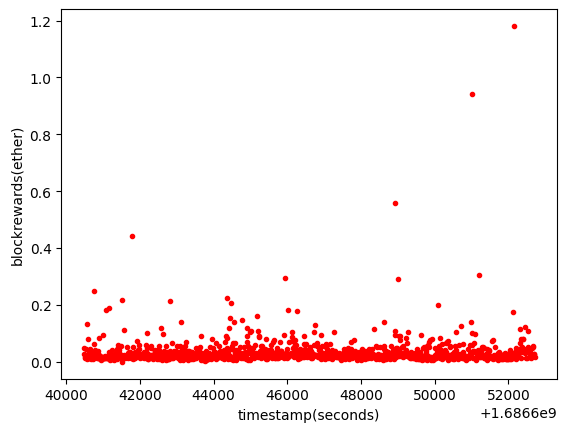

In [5]:
%matplotlib inline
plt.xlabel('timestamp(seconds)')
plt.ylabel('blockrewards(ether)')
plt.scatter(df.timestamp, df.blockReward, color="red", marker=".")

In [6]:
model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(df.timestamp.values.reshape(-1,1), df.blockReward.values.ravel())

RandomForestRegressor(random_state=42)

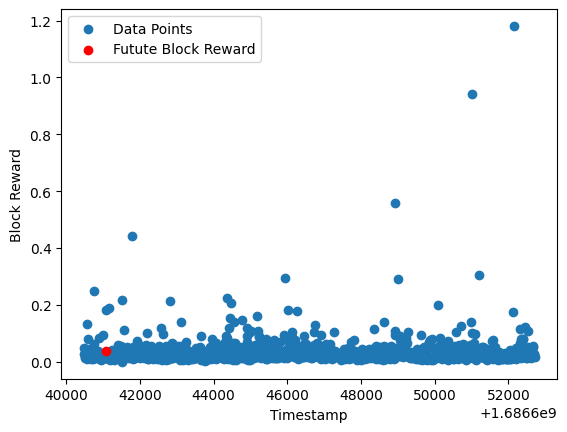

predicted block Reward:  0.03698030271734415


In [7]:
new_timestamp = np.array([[1686641080]])
predicted_blockReward=model.predict(new_timestamp)
plt.scatter(df.timestamp, df.blockReward, label='Data Points')
plt.scatter(new_timestamp, predicted_blockReward, color="red", label="Futute Block Reward")
plt.xlabel('Timestamp')
plt.ylabel('Block Reward')
plt.legend()
plt.show()
print("predicted block Reward: ", predicted_blockReward[0])

In [8]:
df = pd.read_csv("block_data.csv")
# Split the dataset into features (timestamp) and target (blockReward)
X = df.timestamp.values.reshape(-1, 1)
y = df.blockReward.values.ravel()

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict block rewards for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model using mean squared error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
accuracy = 1 - (mse / np.var(y_test))
#print("Accuracy of the model: {:.2f}%".format(accuracy * 100))